In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore')
import gc

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
# sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
# from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,f1_score,r2_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# from sklearn.gaussian_process import GaussianProcessClassifier


In [ ]:
file = pd.read_csv('/content/drive/MyDrive/mental_health.csv')

In [ ]:
file

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
...,...,...
27972,posting everyday people stop caring religion ...,0
27973,okay definetly need hear guys opinion ive pret...,0
27974,cant get dog think ill kill myselfthe last thi...,1
27975,whats point princess bridei really think like ...,1


In [ ]:
file.dropna(inplace=True)
file.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


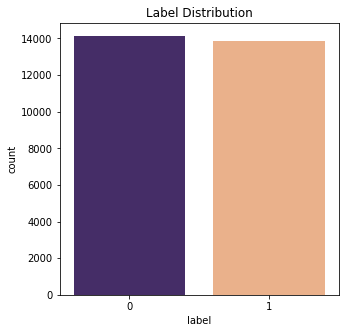

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.title("Label Distribution")
sns.countplot(x=file['label'],palette=['#432371',"#FAAE7B"])
# fig.tight_layout()
plt.show()

In [ ]:
vectorizer = CountVectorizer(min_df=0, lowercase=True)
vectorizer.fit(file['text'])

CountVectorizer(min_df=0)

FEATURE ENGINEERING

In [ ]:
sentences = file['text'].values
labels = file['label'].values

SPLITTING DATASET INTO TRAIN & TEST

In [ ]:
sentences_train, sentences_test, labels_train, labels_test = train_test_split(sentences, labels, test_size=0.2, random_state=42)

In [ ]:
vectorizer.fit(sentences_train)
x_train = vectorizer.transform(sentences_train)
x_test  = vectorizer.transform(sentences_test)

In [ ]:
result=pd.DataFrame(columns=['Name of Model','accuracy','f1_score',"r2score"])
result

,Name of Model,accuracy,f1_score,r2score


In [ ]:
model_list={"Decision Tree Classifier":DecisionTreeClassifier(),"Logistic Regression":LogisticRegression(),"SVC":SVC()}

In [ ]:
def train_model(models):
    for model_name,model in models.items():
        model.fit(x_train,labels_train)
        pred=model.predict(x_test)
        result.loc[len(result.index)]=[model_name,accuracy_score(pred,labels_test),
        f1_score(pred,labels_test),
        r2_score(pred,labels_test),]

In [ ]:
train_model(model_list)

In [ ]:
result

,Name of Model,accuracy,f1_score,r2score
0,Decision Tree Classifier,0.840600,0.841507,0.362296
1,Logistic Regression,0.917977,0.916439,0.671497
2,SVC,0.897248,0.894592,0.588004


**DEEP LEARNING MODEL**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model1 = Sequential()
model1.add(Dense(5, input_dim=x_train.shape[1], activation="relu"))
model1.add(keras.layers.Dropout(0.5))
model1.add(Dense(5, activation="relu"))
model1.add(keras.layers.Dropout(0.5))
model1.add(Dense(1, activation="sigmoid"))

In [ ]:
model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 318675    
                                                                 
 dropout (Dropout)           (None, 5)                 0         
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dropout_1 (Dropout)         (None, 5)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 318,711
Trainable params: 318,711
Non-trainable params: 0
_________________________________________________________________


Training

In [ ]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss',verbose=1, patience = 2)
history = model1.fit(x_train,labels_train,validation_data=(x_test, labels_test), epochs=5, batch_size=10)

Epoch 1/5
2239/2239 [==============================] - 7s 3ms/step - loss: 0.4942 - accuracy: 0.7268 - val_loss: 0.2560 - val_accuracy: 0.9133
Epoch 2/5
2239/2239 [==============================] - 7s 3ms/step - loss: 0.4235 - accuracy: 0.7745 - val_loss: 0.2481 - val_accuracy: 0.9183
Epoch 3/5
2239/2239 [==============================] - 6s 3ms/step - loss: 0.3912 - accuracy: 0.7986 - val_loss: 0.2203 - val_accuracy: 0.9164
Epoch 4/5
2239/2239 [==============================] - 6s 3ms/step - loss: 0.3528 - accuracy: 0.8282 - val_loss: 0.2172 - val_accuracy: 0.9242
Epoch 5/5
2239/2239 [==============================] - 6s 3ms/step - loss: 0.3411 - accuracy: 0.8358 - val_loss: 0.2185 - val_accuracy: 0.9230


In [ ]:
_, accuracy = model1.evaluate(x_train, labels_train)
print("Model accuracy: %.2f"% (accuracy*100))

700/700 [==============================] - 1s 1ms/step - loss: 0.1180 - accuracy: 0.9624
Model accuracy: 96.24


In [ ]:
loss_and_metrics = model1.evaluate(x_test, labels_test, verbose=2)

175/175 - 0s - loss: 0.2185 - accuracy: 0.9230 - 177ms/epoch - 1ms/step


In [ ]:
print("Test Loss", loss_and_metrics[0]*100)
print("Test Accuracy", loss_and_metrics[1]*100)

Test Loss 21.8485489487648
Test Accuracy 92.29807257652283


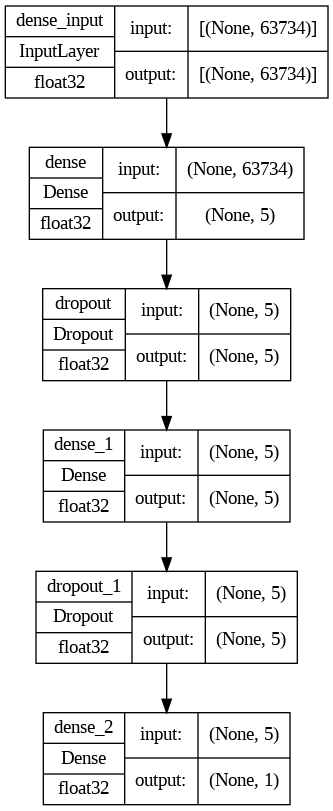

In [ ]:
keras.utils.plot_model(model1,show_shapes=True,show_dtype=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


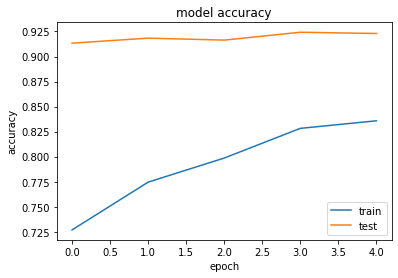

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

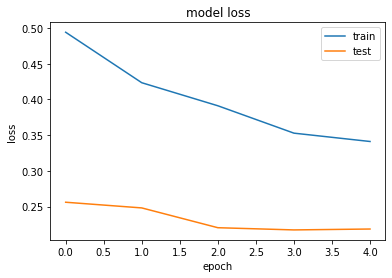

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

Make predictions

In [ ]:
predictions = model1.predict(x_test)
y_pred = [round(x[0]) for x in predictions]
df_test = pd.DataFrame({'text':sentences_test
                        ,'label':labels_test
                        ,'label_pred':y_pred})
df_test.head()

175/175 [==============================] - 0s 971us/step


,text,label,label_pred
0,im ready gothanks previous person commented la...,1,1
1,atoms ashim posting im anonymous molested old...,1,1
2,wanna use omegle cus self esteems low ppl alwa...,0,0
3,hey world questioni curious think lot people r...,1,1
4,guuuuuys passed dance exams honors got honors ...,0,0
